# LSTM (Long Short-Term Memory Paper ) https://www.bioinf.jku.at/publications/older/2604.pdf

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [3]:

# Generate synthetic sequence data (sinusoidal)
def generate_data(seq_len=50, num_samples=1000):
    X, y = [], []
    for _ in range(num_samples):
        start = np.random.rand() * 2 * np.pi
        freq = np.random.rand() * 0.5 + 0.1
        x_seq = np.sin(np.linspace(start, start + freq * seq_len, seq_len))
        y_seq = np.sin(start + freq * seq_len + freq)
        X.append(x_seq)
        y.append(y_seq)
    X = np.array(X)[..., np.newaxis]
    y = np.array(y)
    return X, y

In [4]:
# Create dataset
X, y = generate_data()
X_train, X_val, y_train, y_val = X[:800], X[800:], y[:800], y[800:]

In [5]:
# Define LSTM model
model = Sequential([
    LSTM(32, input_shape=(X.shape[1], 1)),
    Dense(1)
])

In [6]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [7]:
# Train model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.3641 - mae: 0.5341 - val_loss: 0.2627 - val_mae: 0.4531
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2665 - mae: 0.4577 - val_loss: 0.1689 - val_mae: 0.3418
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1880 - mae: 0.3679 - val_loss: 0.1403 - val_mae: 0.3149
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1670 - mae: 0.3460 - val_loss: 0.1082 - val_mae: 0.2755
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1246 - mae: 0.2961 - val_loss: 0.0758 - val_mae: 0.2274


In [8]:
# Evaluate model
loss, mae = model.evaluate(X_val, y_val)
print(f"Validation MAE: {mae:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0726 - mae: 0.2212 
Validation MAE: 0.2274


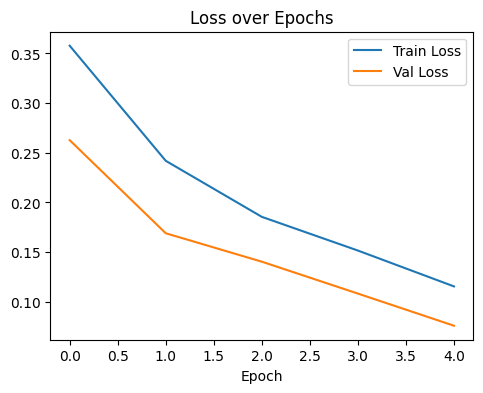

In [9]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.legend()


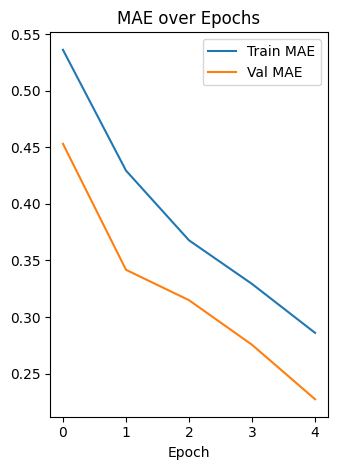

In [10]:
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('MAE over Epochs')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


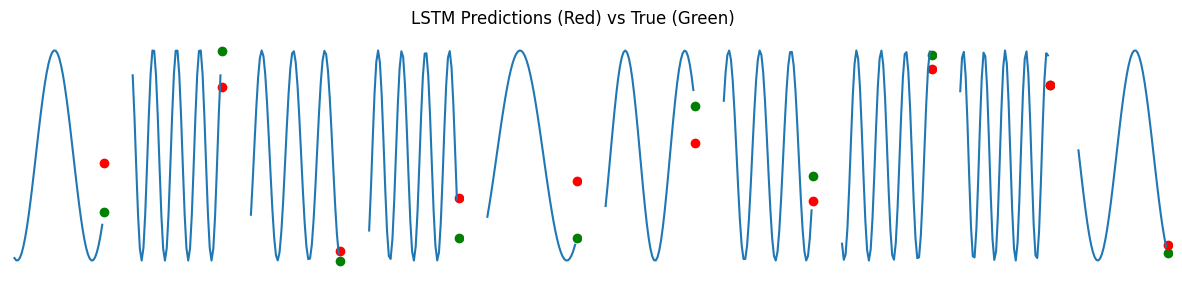

In [11]:
# Visualize predictions
preds = model.predict(X_val[:10])
plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.plot(X_val[i].squeeze(), label='Input')
    plt.scatter(len(X_val[i]), y_val[i], color='green', label='True')
    plt.scatter(len(X_val[i]), preds[i], color='red', label='Pred')
    plt.axis('off')
plt.suptitle('LSTM Predictions (Red) vs True (Green)')
plt.show()

